In [1]:
#Imports

In [2]:
import tensorflow as tf
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile

In [3]:
# import dataset

In [4]:
#Lets use the fashion mnist dataset
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
tf.keras.datasets.fashion_mnist.load_data

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
#reshape training data with no of channels
x_train = x_train.reshape(x_train.shape[0], 28,28,1)

In [10]:
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [11]:
class_names = { 'T-shirt/top', 'Trouser', 'Pullower', "Dress", "Coat", 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'}

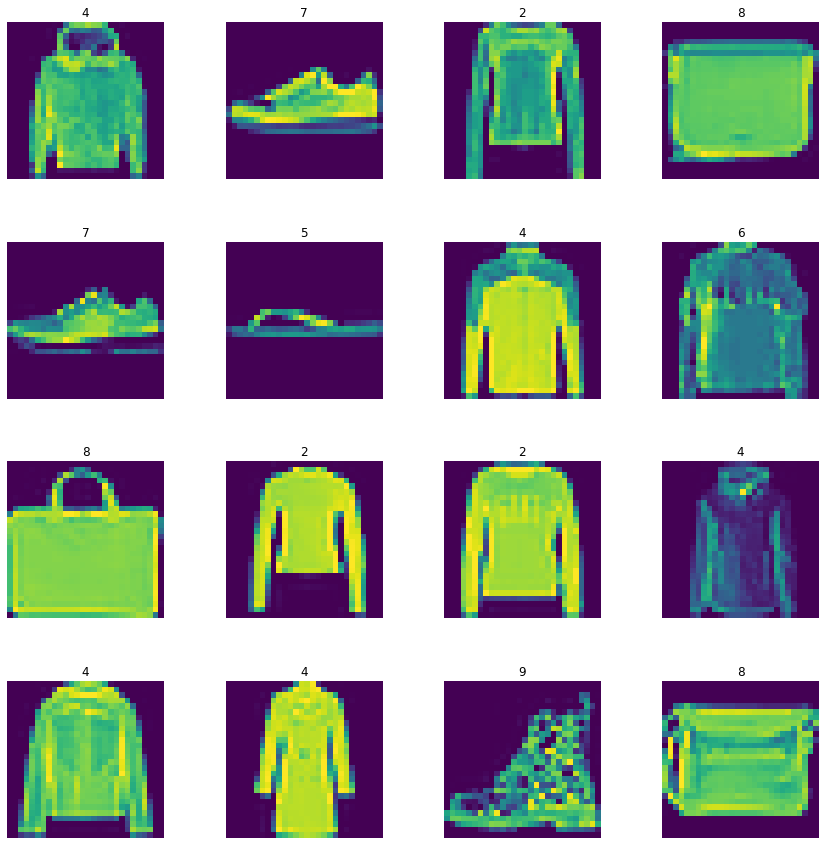

In [17]:
w_grid=4
l_grid = 4
fig,axes = plt.subplots(l_grid, w_grid, figsize=(15,15))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0,l_grid*w_grid ):
    index = np.random.randint(0,n_training)
    axes[i].imshow(x_train[index].reshape(28,28))
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# Build and train the model that we want to deploy

In [19]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(64, activation='relu'))

#final classification layer
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
________________________________________________

# Save the nodel

# explore the trained model

# TF serving Deployment